In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as  plt
import seaborn as sns

import random
from random import sample

pd.set_option('display.max_columns', 1000)
from scipy.interpolate import interp1d
from scipy import interpolate as inter
import scipy.stats
from pandas.plotting import table 
import dataframe_image as dfi

from PIL import Image
pd.set_option('mode.chained_assignment',None)

In [2]:
metabolic = pd.read_csv('metabolic_corr.csv',index_col=0)

In [3]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [4]:
metabolic = metabolic.dropna(axis=0,how='all')
metabolic = metabolic.dropna(axis=1,how='all')
#metabolic = metabolic.dropna(axis=0,how='any')
#metabolic = metabolic.dropna(axis=1,how='any')


In [5]:
display(metabolic.head(20))
display(metabolic.tail(20))


TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   
TAdipose - Visceral (Omentum)M025G001                         0.134702   
TArtery - AortaM020G001                                       0.125879   
TArtery - AortaM029G001                                      -0.189432   
TArtery - AortaM031G001                                      -0.121794   
TArtery - TibialM026G001                                      0.113968   
TArtery - TibialM029G001                                      0.026996   
TArtery - TibialM035G001                                      0.186529   
TBreast - Mammary TissueM016G001                              0.158429   
TBreast - Mammary TissueM017G001                              0.222070   
TCells - Cultured fibroblastsM002G001                         0.027928   
TEsophagus - MucosaM022G001                                  -0.074932   
TEsophagus - MuscularisM019G001                               0.206707   
TEsophagus - MuscularisM035G001                              -0.113269   
THeart - Atrial AppendageM003G001                            -0.034198   
THeart - Atrial AppendageM025G001                             0.049718   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   
TAdipose - Visceral (Omentum)M025G001                        -0.039940   
TArtery - AortaM020G001                                       0.145727   
TArtery - AortaM029G001                                      -0.055024   
TArtery - AortaM031G001                                      -0.101602   
TArtery - TibialM026G001                                      0.254089   
TArtery - TibialM029G001                                     -0.419236   
TArtery - TibialM035G001                                     -0.234707   
TBreast - Mammary TissueM016G001                             -0.020976   
TBreast - Mammary TissueM017G001                             -0.068390   
TCells - Cultured fibroblastsM002G001                        -0.135748   
TEsophagus - MucosaM022G001                                   0.040805   
TEsophagus - MuscularisM019G001                               0.114444   
TEsophagus - MuscularisM035G001                              -0.126502   
THeart - Atrial AppendageM003G001                             0.118740   
THeart - Atrial AppendageM025G001                             0.077329   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   
TAdipose - Visceral (Omentum)M025G001                        -0.094004   
TArtery - AortaM020G001                                      -0.275146   
TArtery - AortaM029G001                                      -0.079593   
TArtery - AortaM031G001                                      -0.141973   
TArtery - TibialM026G001                                      0.396750   
TArtery - TibialM029G001                                     -0.412570   
TArtery - TibialM035G001                 

TAdipose - SubcutaneousM003G001  \
THeart - Left VentricleM003G001                                     -0.032000   
TLiverM010G001                                                      -0.084974   
TLiverM036G001                                                      -0.136013   
TLiverM038G001                                                      -0.125759   
TLungM001G001                                                       -0.100938   
TLungM004G001                                                       -0.072336   
TLungM015G001                                                       -0.109424   
TLungM025G001                                                        0.171658   
TMuscle - SkeletalM007G001                                           0.156986   
TNerve - TibialM012G001                                             -0.019363   
TNerve - TibialM017G001                                             -0.150561   
TSkin - Not Sun Exposed (Suprapubic)M006G001                         0.130140   
TSkin - Not Sun Exposed (Suprapubic)M013G001                        -0.049229   
TSkin - Sun Exposed (Lower leg)M024G001                             -0.008718   
TSkin - Sun Exposed (Lower leg)M036G001                              0.083376   
TTestisM002G001                                                      0.008517   
TThyroidM018G001                                                     0.017593   
TThyroidM032G001                                                    -0.005457   
TWhole BloodM002G001                                                -0.069071   
TWhole BloodM007G001                                                -0.112304   

                                              TAdipose - SubcutaneousM032G001  \
THeart - Left VentricleM003G001                                     -0.127054   
TLiverM010G001                                                      -0.083299   
TLiverM036G001                                                      -0.100977   
TLiverM038G001                                                       0.019475   
TLungM001G001                                                       -0.192514   
TLungM004G001                                                       -0.018581   
TLungM015G001                                                        0.141619   
TLungM025G001                                                        0.048976   
TMuscle - SkeletalM007G001                                          -0.168553   
TNerve - TibialM012G001                                              0.016797   
TNerve - TibialM017G001                                             -0.116788   
TSkin - Not Sun Exposed (Suprapubic)M006G001                        -0.158013   
TSkin - Not Sun Exposed (Suprapubic)M013G001                         0.058744   
TSkin - Sun Exposed (Lower leg)M024G001                              0.079590   
TSkin - Sun Exposed (Lower leg)M036G001                             -0.045184   
TTestisM002G001                                                     -0.094100   
TThyroidM018G001                                                     0.021687   
TThyroidM032G001                                                    -0.107820   
TWhole BloodM002G001                                                -0.033059   
TWhole BloodM007G001                                                 0.130825   

                                              TAdipose - SubcutaneousM038G001  \
THeart - Left VentricleM003G001                                     -0.127083   
TLiverM010G001                                                      -0.230754   
TLiverM036G001                                                      -0.372227   
TLiverM038G001                                                      -0.502258   
TLungM001G001                                                        0.009424   
TLungM004G001                                                        0.092035   
TLungM015G001                                                        0.0032

In [6]:
print(metabolic.shape)
met_shape = metabolic.shape[0]

(40, 40)


In [7]:
corr_thresholds = list(range(200, 651, 5))
myInt = 1000
corr_thresholds[:] = [x / myInt for x in corr_thresholds]
print(corr_thresholds)
print(len(corr_thresholds))

pos_cases = [0]*91
neg_cases = [0]*91
ratio_pos_neg = [0]*91



[0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65]
91


In [8]:
corrlist = []
metabolic_indexes = metabolic.index.tolist()
metabolic_columns = metabolic.columns.tolist()

for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        #if meti !=metj:
        corrlist.append(metabolic.iloc[i,j])
        
inter_met_corr = len(corrlist)
print(inter_met_corr)



780


In [35]:
d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
df_metabolic = pd.DataFrame(d)


for i in range(df_metabolic.shape[0]):
    count_pos = 0
    count_neg = 0
    for j in range(len(corrlist)):
        if corrlist[j] >= df_metabolic['corr thresholds'].iloc[i]:
            count_pos +=1
    for j in range(len(corrlist)):
        if corrlist[j] <= -df_metabolic['corr thresholds'].iloc[i]:
            count_neg +=1
    df_metabolic['pos cases'].iloc[i] = count_pos
    df_metabolic['neg cases'].iloc[i] = count_neg
    df_metabolic['ratio pos neg'].iloc[i] = count_pos / max(count_neg,1)
    
display(df_metabolic.head(50))   
                   
        

corr thresholds  pos cases  neg cases  ratio pos neg
0             0.200         89         53       1.679245
1             0.205         85         50       1.700000
2             0.210         83         45       1.844444
3             0.215         78         41       1.902439
4             0.220         73         37       1.972973
5             0.225         71         36       1.972222
6             0.230         68         35       1.942857
7             0.235         67         28       2.392857
8             0.240         64         26       2.461538
9             0.245         64         26       2.461538
10            0.250         61         26       2.346154
11            0.255         57         25       2.280000
12            0.260         57         25       2.280000
13            0.265         52         24       2.166667
14            0.270         47         21       2.238095
15            0.275         42         20       2.100000
16            0.280         40         18       2.222222
17            0.285         39         16       2.437500
18            0.290         37         16       2.312500
19            0.295         36         16       2.250000
20            0.300         36         15       2.400000
21            0.305         36         13       2.769231
22            0.310         33         12       2.750000
23            0.315         32         12       2.666667
24            0.320         31         11       2.818182
25            0.325         30         10       3.000000
26            0.330         29         10       2.900000
27            0.335         28          9       3.111111
28            0.340         27          9       3.000000
29            0.345         26          9       2.888889
30            0.350         26          9       2.888889
31            0.355         25          9       2.777778
32            0.360         25          8       3.125000
33            0.365         22          8       2.750000
34            0.370         22          8       2.750000
35            0.375         22          7       3.142857
36            0.380         22          7       3.142857
37            0.385         21          6       3.500000
38            0.390         21          6       3.500000
39            0.395         21          6       3.500000
40            0.400         19          6       3.166667
41            0.405         19          6       3.166667
42            0.410         19          6       3.166667
43            0.415         17          5       3.400000
44            0.420         16          4       4.000000
45            0.425         16          4       4.000000
46            0.430         16          4       4.000000
47            0.435         16          4       4.000000
48            0.440         16          4       4.000000
49            0.445         16          4       4.000000

In [10]:
display(df_metabolic.tail(33))   

corr thresholds  pos cases  neg cases  ratio pos neg
58            0.490          9          1            9.0
59            0.495          8          1            8.0
60            0.500          8          1            8.0
61            0.505          8          0            8.0
62            0.510          8          0            8.0
63            0.515          8          0            8.0
64            0.520          8          0            8.0
65            0.525          8          0            8.0
66            0.530          8          0            8.0
67            0.535          7          0            7.0
68            0.540          7          0            7.0
69            0.545          7          0            7.0
70            0.550          6          0            6.0
71            0.555          6          0            6.0
72            0.560          5          0            5.0
73            0.565          5          0            5.0
74            0.570          5          0            5.0
75            0.575          5          0            5.0
76            0.580          5          0            5.0
77            0.585          5          0            5.0
78            0.590          5          0            5.0
79            0.595          5          0            5.0
80            0.600          5          0            5.0
81            0.605          5          0            5.0
82            0.610          5          0            5.0
83            0.615          5          0            5.0
84            0.620          5          0            5.0
85            0.625          5          0            5.0
86            0.630          5          0            5.0
87            0.635          5          0            5.0
88            0.640          4          0            4.0
89            0.645          3          0            3.0
90            0.650          3          0            3.0

In [11]:
tissue_key = pd.read_csv('IncludedTissuesSelect.csv',index_col=0)
display(tissue_key.head(19))

tissue_key_index_list = tissue_key.index.tolist()
data_frames = []
for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    print(current)
 

Quantity
Tissue Type                                  
Adipose - Subcutaneous                      3
Adipose - Visceral (Omentum)                3
Artery - Aorta                              3
Artery - Tibial                             3
Breast - Mammary Tissue                     2
Cells - Cultured fibroblasts                1
Esophagus - Mucosa                          1
Esophagus - Muscularis                      2
Heart - Atrial Appendage                    2
Heart - Left Ventricle                      1
Liver                                       3
Lung                                        4
Muscle - Skeletal                           1
Nerve - Tibial                              2
Skin - Not Sun Exposed (Suprapubic)         2
Skin - Sun Exposed (Lower leg)              2
Testis                                      1
Thyroid                                     2
Whole Blood                                 2

TAdipose - Subcutaneous_df.csv
TAdipose - Visceral (Omentum)_df.csv
TArtery - Aorta_df.csv
TArtery - Tibial_df.csv
TBreast - Mammary Tissue_df.csv
TCells - Cultured fibroblasts_df.csv
TEsophagus - Mucosa_df.csv
TEsophagus - Muscularis_df.csv
THeart - Atrial Appendage_df.csv
THeart - Left Ventricle_df.csv
TLiver_df.csv
TLung_df.csv
TMuscle - Skeletal_df.csv
TNerve - Tibial_df.csv
TSkin - Not Sun Exposed (Suprapubic)_df.csv
TSkin - Sun Exposed (Lower leg)_df.csv
TTestis_df.csv
TThyroid_df.csv
TWhole Blood_df.csv


In [12]:
tissue_key_index_list = tissue_key.index.tolist()
data_frames = []


for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    data_frames.append(current)

tissue_key['DataFrames'] = data_frames
display(tissue_key.head())

Quantity                            DataFrames
Tissue Type                                                                 
Adipose - Subcutaneous               3        TAdipose - Subcutaneous_df.csv
Adipose - Visceral (Omentum)         3  TAdipose - Visceral (Omentum)_df.csv
Artery - Aorta                       3                TArtery - Aorta_df.csv
Artery - Tibial                      3               TArtery - Tibial_df.csv
Breast - Mammary Tissue              2       TBreast - Mammary Tissue_df.csv

In [13]:
def select_subset(seedbasis):
    modules = []
    for i in range(tissue_key.shape[0]):
        current_seed = seedbasis+i
        sample_size = tissue_key['Quantity'].iloc[i]
        current_df = tissue_key['DataFrames'].iloc[i]
        df = pd.read_csv(current_df,index_col=0)
        df = df.sample(random_state=current_seed, n=sample_size, axis=1)
        df_columns = df.columns.tolist()
        for j in range(len(df_columns)):
            modules.append(df_columns[j])
        #print(modules)
        #print(len(modules))
    return(modules)

a = select_subset(2000)
print(a)

['TAdipose - SubcutaneousM006G002', 'TAdipose - SubcutaneousM018G006', 'TAdipose - SubcutaneousM012G099', 'TAdipose - Visceral (Omentum)M022G005', 'TAdipose - Visceral (Omentum)M009G006', 'TAdipose - Visceral (Omentum)M023G005', 'TArtery - AortaM022G099', 'TArtery - AortaM036G099', 'TArtery - AortaM049G099', 'TArtery - TibialM023G002', 'TArtery - TibialM028G099', 'TArtery - TibialM020G099', 'TBreast - Mammary TissueM001G002', 'TBreast - Mammary TissueM014G005', 'TCells - Cultured fibroblastsM003G006', 'TEsophagus - MucosaM021G006', 'TEsophagus - MuscularisM027G005', 'TEsophagus - MuscularisM008G002', 'THeart - Atrial AppendageM016G003', 'THeart - Atrial AppendageM021G003', 'THeart - Left VentricleM015G002', 'TLiverM034G099', 'TLiverM037G006', 'TLiverM006G006', 'TLungM003G004', 'TLungM020G006', 'TLungM017G006', 'TLungM002G099', 'TMuscle - SkeletalM014G006', 'TNerve - TibialM049G099', 'TNerve - TibialM046G099', 'TSkin - Not Sun Exposed (Suprapubic)M010G006', 'TSkin - Not Sun Exposed (Sup

In [14]:
iterationk = 1000
tissue = 1

In [15]:
all_corrs = pd.read_csv('big_corr.csv',index_col=0)
print(all_corrs.shape)


(609, 609)


In [16]:
all_corrs_values = []

big_indexes = all_corrs.index.tolist()
big_columns = all_corrs.columns.tolist()

counter = 0

for i in range(all_corrs.shape[0]):
    for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            
print(len(all_corrs_values))


174012


In [17]:
def make_smaller_df(df_all, random_state_seed):
    #print('hi')
    #print(type(df_all))
    #print(df_all.shape)
    #print(size_of_subset)
    
    df_all_index = df_all.index.tolist()
    #print(df_all_index)
    #print(len(df_all_index))
    sub_corrs = select_subset(random_state_seed)
    #print(sub_corrs)
    #print(len(sub_corrs))
    new_df = df_all[sub_corrs]
    new_df = new_df.loc[sub_corrs]
    
    corrs = []
    new_df_index = new_df.index.tolist()
    new_df_columns = new_df.columns.tolist()
    for i in range(new_df.shape[0]):
        for j in range(i+1,new_df.shape[1]):
            newi = new_df_index[i]
            newj = new_df_columns[j]
            newi = newi[1:-8]
            newj = newj[1:-8]
            #if newi != newj:
            corrs.append(new_df.iloc[i,j])
    #print(len(corrs))        
    
    '''
    
    metabolic_indexes = metabolic.index.tolist()
    metabolic_columns = metabolic.columns.tolist()
    for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        if meti !=metj:
            corrlist.append(metabolic.iloc[i,j])
        
    inter_met_corr = len(corrlist)
    print(inter_met_corr)

    '''
    
    
    '''
    print('in make smaller')
    print(type(all_list))
    print(size_of_subset)
    
    print('sub_corrs')
    print(sub_corrs)
    print(len(sub_corrs))
    
    
    #print(sample(list1,3))

    return sub_corrs
    '''
    return corrs
#ex1 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex1)
#print(len(ex1))
      
#ex2 = make_smaller_df(all_corrs_values,inter_met_corr)
#print(ex2)
#print(len(ex2))



    


In [18]:
def one_iteration_subsample(df,random_state_seed):
    
    
    #df2 = make_smaller_df(df)
    #print('one iterationa subsample')
    #print(type(df))
    #print(df.shape)
    
    
    corr2list = make_smaller_df(df,random_state_seed)
   
    
    #for i in range(df2.shape[0]):
    #    for j in range(i+1,df2.shape[1]):
    #        corr2list.append(df2.iloc[i,j])
            
            
    corr_thresholds = list(range(200, 651, 5))
    myInt = 1000
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]


    pos_cases = [0]*91
    neg_cases = [0]*91
    ratio_pos_neg = [0]*91
    
    d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'ratio pos neg' : ratio_pos_neg}
     
    df_corr_stats = pd.DataFrame(d)
   


    for i in range(df_corr_stats.shape[0]):
        count_pos = 0
        count_neg = 0
        for j in range(len(corr2list)):
            if corr2list[j] >= df_metabolic['corr thresholds'].iloc[i]:
                count_pos +=1
        for j in range(len(corr2list)):
            if corr2list[j] <= -df_metabolic['corr thresholds'].iloc[i]:
                count_neg +=1
        df_corr_stats['pos cases'].iloc[i] = count_pos
        df_corr_stats['neg cases'].iloc[i] = count_neg
        df_corr_stats['ratio pos neg'].iloc[i] = count_pos / max(1,count_neg)
    
    return df_corr_stats





In [19]:
corr_big_list = []
pos_big_list = []
neg_big_list = []
ratio_big_list = []



for k in range(1000):
    if (k % 100 == 0):
        print (k)
    #print(all_corrs.shape)
    k_times_1000 = k*1000
    df_stats = one_iteration_subsample(all_corrs,k_times_1000)
    threshold = df_stats['corr thresholds'].tolist()
    positives = df_stats['pos cases'].tolist()
    negatives = df_stats['neg cases'].tolist()
    ratios = df_stats['ratio pos neg'].tolist()
    corr_big_list = corr_big_list+threshold
    pos_big_list = pos_big_list+positives
    neg_big_list = neg_big_list+negatives
    ratio_big_list = ratio_big_list + ratios

print(len(corr_big_list))
    
    
   

0
100
200
300
400
500
600
700
800
900
91000


In [20]:
d = {'corr thresholds' : corr_big_list, 
     'pos cases' : pos_big_list,
     'neg cases' : neg_big_list,
     'ratios': ratio_big_list
     }
     
df_corr_stats = pd.DataFrame(d)
print(df_corr_stats.shape)
display(df_corr_stats.head(3))
display(df_corr_stats.tail(4))


(91000, 4)


corr thresholds  pos cases  neg cases    ratios
0            0.200         91         83  1.096386
1            0.205         83         80  1.037500
2            0.210         83         77  1.077922

corr thresholds  pos cases  neg cases  ratios
90996            0.635          1          1     1.0
90997            0.640          1          1     1.0
90998            0.645          1          1     1.0
90999            0.650          1          1     1.0

In [21]:
quantile95 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)

In [22]:
quantile05 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.05)

In [37]:
display(quantile05.head(42))

pos cases  neg cases    ratios
corr thresholds                                
0.200                49.00       47.0  0.775844
0.205                46.00       44.0  0.769175
0.210                43.00       41.0  0.761810
0.215                40.00       38.0  0.752644
0.220                38.00       35.0  0.743507
0.225                35.00       33.0  0.750000
0.230                33.00       31.0  0.745747
0.235                31.00       29.0  0.736792
0.240                29.00       27.0  0.731707
0.245                27.00       25.0  0.722076
0.250                25.00       23.0  0.711848
0.255                24.00       22.0  0.708301
0.260                22.00       20.0  0.699884
0.265                20.00       19.0  0.700000
0.270                19.00       17.0  0.687500
0.275                17.00       16.0  0.678571
0.280                16.00       15.0  0.666667
0.285                15.00       14.0  0.666667
0.290                14.00       13.0  0.666312
0.295                13.00       12.0  0.652174
0.300                12.00       11.0  0.650000
0.305                12.00       10.0  0.647059
0.310                11.00       10.0  0.636124
0.315                10.00        9.0  0.631579
0.320                 9.95        8.0  0.611111
0.325                 9.00        7.0  0.608696
0.330                 9.00        7.0  0.600000
0.335                 8.00        6.0  0.600000
0.340                 7.00        6.0  0.600000
0.345                 7.00        5.0  0.587990
0.350                 6.00        5.0  0.583333
0.355                 6.00        4.0  0.583114
0.360                 6.00        4.0  0.583013
0.365                 5.00        4.0  0.541250
0.370                 4.00        3.0  0.538205
0.375                 4.00        3.0  0.500000
0.380                 4.00        3.0  0.500000
0.385                 4.00        2.0  0.500000
0.390                 3.00        2.0  0.470392
0.395                 3.00        2.0  0.500000
0.400                 3.00        2.0  0.454545
0.405                 3.00        2.0  0.444444

In [24]:
display(quantile95.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.200                92.00      91.05  1.363724
0.205                87.00      87.00  1.354839
0.210                84.00      84.00  1.362147
0.215                80.00      79.05  1.382466
0.220                76.05      76.05  1.420111
0.225                73.00      73.00  1.425000
0.230                70.00      70.00  1.440222
0.235                67.05      68.00  1.463415
0.240                64.00      64.00  1.472970
0.245                61.00      62.00  1.514329
0.250                58.00      58.05  1.528312
0.255                55.05      55.05  1.555556
0.260                53.00      53.00  1.572024
0.265                51.05      51.00  1.600000
0.270                49.00      49.00  1.666667
0.275                47.00      46.05  1.667424
0.280                45.00      45.00  1.722778
0.285                42.00      42.05  1.786429
0.290                41.00      41.00  1.858036
0.295                39.00      38.00  1.838254
0.300                37.05      37.00  1.857143
0.305                36.00      35.00  1.875000
0.310                35.00      34.00  1.916987
0.315                33.05      32.00  1.900455
0.320                32.00      31.00  2.048016
0.325                31.00      29.00  2.125000
0.330                29.00      28.00  2.200000
0.335                28.05      26.00  2.273377
0.340                27.00      25.00  2.333333
0.345                25.00      24.00  2.376250
0.350                25.00      23.00  2.505000
0.355                24.00      22.00  2.666667
0.360                23.00      21.00  2.750000
0.365                21.05      20.00  3.000000

In [25]:
df_all_corr_averages = df_corr_stats.groupby('corr thresholds').mean()

df_all_corr_std = df_corr_stats.groupby('corr thresholds').std()

df_all_corr_std.rename(columns = {'pos cases':'pos std', 
                                  'neg cases':'neg std',
                                  'ratios' : 'ratio std'}, inplace = True)

df_all = pd.concat([df_all_corr_averages, df_all_corr_std], join="inner",axis=1)


        
        


df_all['pos lower'] = df_all['pos cases'] - df_all['pos std']
df_all['pos higher'] = df_all['pos cases'] + df_all['pos std']
df_all['neg lower'] = df_all['neg cases'] - df_all['neg std']
df_all['neg higher'] = df_all['neg cases'] + df_all['neg std']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] < 0.1:
        df_all['neg cases'].iloc[i] = 20

df_all['ratios'] = df_all['pos cases'] / df_all['neg cases']

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] == 20:
        df_all['neg cases'].iloc[i] = 20


display(df_all)

pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.200               68.626     68.024  1.008850  13.190455  13.617961   
0.205               64.614     64.630  0.999752  12.870923  13.366741   
0.210               61.578     61.170  1.006670  12.620269  13.187381   
0.215               57.994     57.625  1.006403  12.411850  12.905228   
0.220               55.299     54.453  1.015536  12.151348  12.587543   
...                    ...        ...       ...        ...        ...   
0.630                0.952      0.803  1.185554   0.943709   0.896099   
0.635                0.935      0.753  1.241700   0.938966   0.867608   
0.640                0.883      0.734  1.202997   0.915505   0.856725   
0.645                0.858      0.709  1.210155   0.897018   0.837269   
0.650                0.811      0.697  1.163558   0.860244   0.832998   

                 ratio std  pos lower  pos higher  neg lower  neg higher  
corr thresholds                                                           
0.200             0.196818  55.435545   81.816455  54.406039   81.641961  
0.205             0.201296  51.743077   77.484923  51.263259   77.996741  
0.210             0.211634  48.957731   74.198269  47.982619   74.357381  
0.215             0.217893  45.582150   70.405850  44.719772   70.530228  
0.220             0.223766  43.147652   67.450348  41.865457   67.040543  
...                    ...        ...         ...        ...         ...  
0.630             0.897857   0.008291    1.895709  -0.093099    1.699099  
0.635             0.897199  -0.003966    1.873966  -0.114608    1.620608  
0.640             0.875682  -0.032505    1.798505  -0.122725    1.590725  
0.645             0.856455  -0.039018    1.755018  -0.128269    1.546269  
0.650             0.821322  -0.049244    1.671244  -0.135998    1.529998  

[91 rows x 10 columns]

In [26]:
df_all['ratios'] =  df_all['ratios'].replace(np.inf, 20)
df_all['ratios'] =  df_all['ratios'].replace(np.nan, 20)
df_all['ratios'] =  df_all['ratios']
df_all['ratios std plus'] = df_all['ratios']+ df_all['ratio std']
df_all['ratios std minus'] = df_all['ratios'] - df_all['ratio std']

display(df_all)


pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.200               68.626     68.024  1.008850  13.190455  13.617961   
0.205               64.614     64.630  0.999752  12.870923  13.366741   
0.210               61.578     61.170  1.006670  12.620269  13.187381   
0.215               57.994     57.625  1.006403  12.411850  12.905228   
0.220               55.299     54.453  1.015536  12.151348  12.587543   
...                    ...        ...       ...        ...        ...   
0.630                0.952      0.803  1.185554   0.943709   0.896099   
0.635                0.935      0.753  1.241700   0.938966   0.867608   
0.640                0.883      0.734  1.202997   0.915505   0.856725   
0.645                0.858      0.709  1.210155   0.897018   0.837269   
0.650                0.811      0.697  1.163558   0.860244   0.832998   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.200             0.196818  55.435545   81.816455  54.406039   81.641961   
0.205             0.201296  51.743077   77.484923  51.263259   77.996741   
0.210             0.211634  48.957731   74.198269  47.982619   74.357381   
0.215             0.217893  45.582150   70.405850  44.719772   70.530228   
0.220             0.223766  43.147652   67.450348  41.865457   67.040543   
...                    ...        ...         ...        ...         ...   
0.630             0.897857   0.008291    1.895709  -0.093099    1.699099   
0.635             0.897199  -0.003966    1.873966  -0.114608    1.620608   
0.640             0.875682  -0.032505    1.798505  -0.122725    1.590725   
0.645             0.856455  -0.039018    1.755018  -0.128269    1.546269   
0.650             0.821322  -0.049244    1.671244  -0.135998    1.529998   

                 ratios std plus  ratios std minus  
corr thresholds                                     
0.200                   1.205668          0.812032  
0.205                   1.201049          0.798456  
0.210                   1.218304          0.795035  
0.215                   1.224296          0.788510  
0.220                   1.239302          0.791770  
...                          ...               ...  
0.630                   2.083411          0.287697  
0.635                   2.138899          0.344500  
0.640                   2.078680          0.327315  
0.645                   2.066610          0.353700  
0.650                   1.984880          0.342236  

[91 rows x 12 columns]

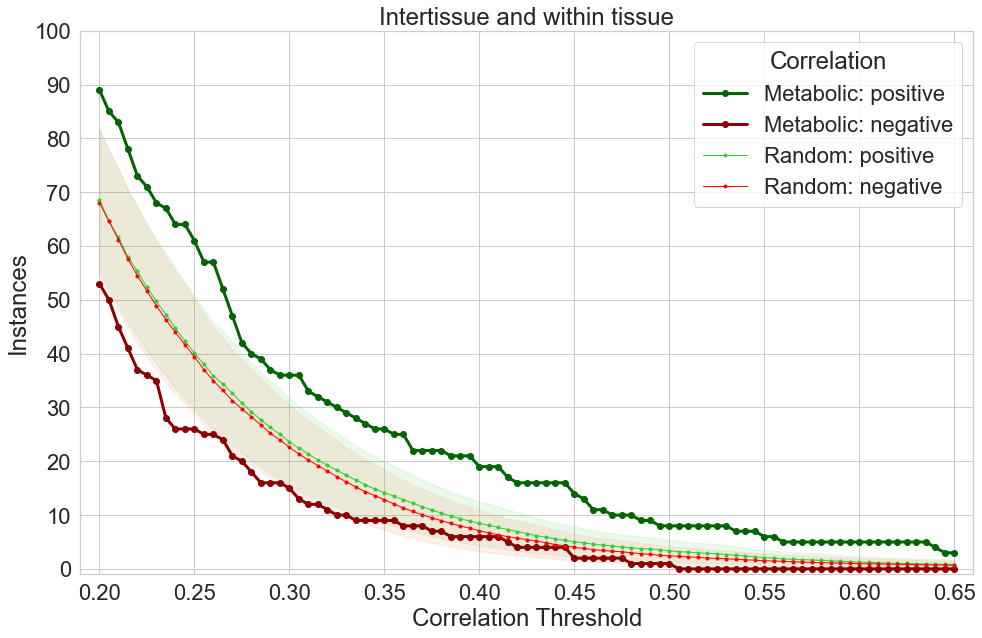

In [27]:

#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))
plt.ylim(-1, 100)
plt.yticks([0,10,20,30,40,50,
            60,70,80,90,100])
plt.xticks([0.2,0.25,0.3,0.35,
           0.40,0.45,0.5,0.55,
           0.60,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')
'''
plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='mediumturquoise')
plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='coral')
'''

plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=3, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=3, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            #"Random 95th  percentile: positive",
            #"Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative"], loc ="upper right",title="Correlation")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Instances')
plt.title('Intertissue and within tissue')
plt.savefig('3APlus.png',dpi=600)



In [28]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")


ax = plt.figure(figsize=(16, 10))
plt.ylim(-1, 150)
plt.yticks([0,50,100])
plt.xticks([0.2,0.25,0.3,35,
           0.40,0.45,0.5,0.55,
           0.60,0.65])
plt.xlim(0.19,0.66)


x = df_all_corr_averages.index.tolist()
met_pos = df_metabolic['pos cases'].tolist()
met_neg = df_metabolic['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')
#plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='mediumturquoise')
#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            "Random 95th  percentile: positive",
            "Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative"], loc ="upper right",title="Correlation")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Instances')
plt.title('Intertissue and within tissue')
plt.savefig('InterIntraCorrTo65',dpi=600)
'''

'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(-1, 150)\nplt.yticks([0,50,100])\nplt.xticks([0.2,0.25,0.3,35,\n           0.40,0.45,0.5,0.55,\n           0.60,0.65])\nplt.xlim(0.19,0.66)\n\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_metabolic[\'pos cases\'].tolist()\nmet_neg = df_metabolic[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidth=3, markersize=

In [29]:
ratio_quantile95 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
ratio_quantile90 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [30]:
display(ratio_quantile95 )

pos cases  neg cases    ratios
corr thresholds                                
0.200                92.00      91.05  1.363724
0.205                87.00      87.00  1.354839
0.210                84.00      84.00  1.362147
0.215                80.00      79.05  1.382466
0.220                76.05      76.05  1.420111
...                    ...        ...       ...
0.630                 3.00       2.00  3.000000
0.635                 3.00       2.00  3.000000
0.640                 2.00       2.00  2.000000
0.645                 2.00       2.00  2.000000
0.650                 2.00       2.00  2.000000

[91 rows x 3 columns]

In [31]:
display(ratio_quantile90)

pos cases  neg cases    ratios
corr thresholds                                
0.200                 85.1       86.0  1.260000
0.205                 82.0       82.0  1.254545
0.210                 78.0       79.0  1.269231
0.215                 74.0       75.0  1.269940
0.220                 70.0       71.0  1.307692
...                    ...        ...       ...
0.630                  2.0        2.0  2.000000
0.635                  2.0        2.0  2.000000
0.640                  2.0        2.0  2.000000
0.645                  2.0        2.0  2.000000
0.650                  2.0        2.0  2.000000

[91 rows x 3 columns]

In [32]:
display(ratio_quantile90.sample(50))

pos cases  neg cases    ratios
corr thresholds                                
0.315                 30.0       29.0  1.687500
0.595                  3.0        2.0  2.000000
0.370                 18.0       16.1  2.250000
0.495                  6.0        5.0  4.000000
0.650                  2.0        2.0  2.000000
0.395                 14.0       13.0  2.500000
0.475                  7.0        6.0  4.000000
0.345                 23.0       21.0  2.000000
0.405                 13.0       12.0  2.758333
0.545                  4.0        3.1  3.000000
0.585                  3.0        3.0  3.000000
0.515                  5.0        4.0  4.000000
0.270                 45.0       45.0  1.476190
0.340                 24.0       22.0  1.857143
0.470                  7.0        6.0  4.000000
0.245                 56.1       57.0  1.352941
0.510                  6.0        5.0  4.000000
0.465                  8.0        7.0  4.000000
0.400                 14.0       12.0  2.560000
0.590                  3.0        3.0  3.000000
0.280                 41.0       41.0  1.500000
0.275                 43.0       43.0  1.500000
0.520                  5.0        4.0  4.000000
0.255                 52.0       51.0  1.369079
0.580                  3.0        3.0  3.000000
0.525                  5.0        4.0  4.000000
0.500                  6.0        5.0  4.000000
0.385                 15.0       14.0  2.500000
0.640                  2.0        2.0  2.000000
0.430                 10.0        9.0  3.000000
0.420                 12.0       10.0  3.000000
0.570                  3.0        3.0  3.000000
0.375                 17.0       15.1  2.340000
0.560                  4.0        3.0  3.000000
0.565                  3.0        3.0  3.000000
0.410                 13.0       11.0  3.000000
0.215                 74.0       75.0  1.269940
0.490                  7.0        5.0  4.000000
0.260                 49.0       49.0  1.391460
0.305                 33.0       32.0  1.637013
0.290                 37.0       37.0  1.555556
0.480                  7.0        6.0  4.000000
0.365                 19.0       17.0  2.145238
0.265                 47.0       47.0  1.437500
0.335                 25.0       23.0  1.875000
0.200                 85.1       86.0  1.260000
0.555                  4.0        3.0  3.000000
0.390                 15.0       13.0  2.500000
0.630                  2.0        2.0  2.000000
0.425                 11.0       10.0  3.000000

In [33]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")


ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 12)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])
plt.xlim(0.19,0.66)

x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            "Random 99th  percentile ratio: pos /neg"
          
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper left",title="Ratios")
            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue and within tissue')
plt.savefig('Inter plus corr Ratio legend', dpi=600)
#plt.savefig('CombinedCorrNoIntra.png')
'''


'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(0, 12)\nplt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])\nplt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])\nplt.xlim(0.19,0.66)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_metabolic[\'ratio pos neg\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\n#mean_ran_pos = df_all[\'pos cases\'].tolist()\n#mean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratios std minus\'].tolist()\nupper_bound_ratio = df_all[\'ratios std plus\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\npercentile90 = ratio_quantile90[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'o

In [34]:
'''
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")


ax = plt.figure(figsize=(16, 10))
plt.ylim(0, 4)
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])
plt.xlim(0.19,0.66)


x = df_all_corr_averages.index.tolist()
met_ratio = df_metabolic['ratio pos neg'].tolist()
avg_ratio = df_all['ratios'].tolist()

#mean_ran_pos = df_all['pos cases'].tolist()
#mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratios std minus'].tolist()
upper_bound_ratio = df_all['ratios std plus'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg ",
            "Random 95th  percentile ratio: pos /neg",
            "Random 99th  percentile ratio: pos /neg"
          
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Ratios")

            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('Correlation Threshold')
plt.ylabel('Ratio')
plt.title('Intertissue and within tissue')
plt.savefig('Inter plus corr Ratio no legend', dpi=600)
#plt.savefig('CombinedCorrNoIntra.png')
'''


'\n#smooth = df2[\'Ratio\'].to_numpy()\n#print(lower_bound)\n#print(upper_bound)\nsns.set(font_scale = 2,style="whitegrid")\n\n\nax = plt.figure(figsize=(16, 10))\nplt.ylim(0, 4)\nplt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])\nplt.xticks([0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65])\nplt.xlim(0.19,0.66)\n\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_metabolic[\'ratio pos neg\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\n#mean_ran_pos = df_all[\'pos cases\'].tolist()\n#mean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratios std minus\'].tolist()\nupper_bound_ratio = df_all[\'ratios std plus\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\npercentile90 = ratio_quantile90[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \n\n\n\n\nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'